Importar librerías

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep

Cargar y visualizar los datos.

In [33]:
data = pd.read_csv('dataset.csv')
print(data.head())

         X1        X2    Y
0  0.142131  0.845482  0.0
1  0.869759  0.708864  1.0
2  0.238923  0.919601  0.0
3  0.268460  0.431270  0.0
4  0.922154  0.470211  1.0


Plot de los datos.

X1 shape: (100,)
X2 shape: (100,)
Y shape: (100,)


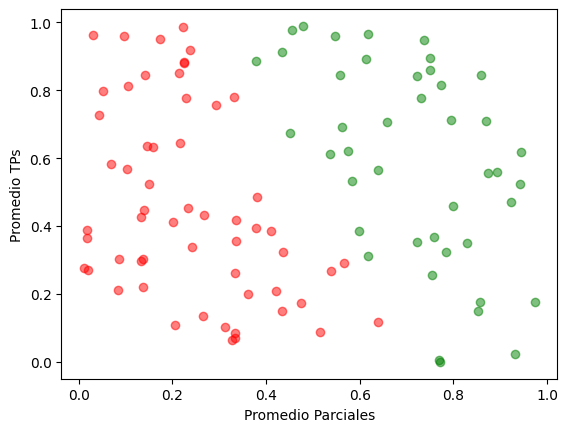

In [34]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

print("X1 shape:", X1.shape)
print("X2 shape:", X2.shape)
print("Y shape:", Y.shape)

plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

plt.xlabel('Promedio Parciales')
plt.ylabel('Promedio TPs')

plt.show()

Definimos la función candidata.

In [35]:
def perceptron(x1, x2, params):
    linear_combination = x1 * params['w1'] + x2 * params['w2'] + params['b']
    return (linear_combination >= 0) * 1

Definimos una función costo, por ejemplo, el error absoluto medio.

In [50]:
def loss(y_predicted, y_real):
    return np.mean(np.absolute(y_predicted - y_real))

De ahora en adelante, el objetivo es encontrar los parámetros que minimicen la función costo.

Ejemplo con valores iniciales aleatorios:

In [52]:
params = {
    'w1': 0.7,
    'w2': -0.7,
    'b': 1
}

y_predicted = perceptron(X1, X2, params)

print('Loss:', loss(y_predicted, Y))

Loss: 0.57


## Primer approach: Método Monte Carlo
La idea es generar valores aleatorios para los parámetros y ver cuál es el que minimiza la función costo.

In [81]:
best_loss = 1
best_params = params.copy()

ITERATIONS = 10000

for i in range(ITERATIONS):
    params['w1'] = np.random.uniform(-1, 1)
    params['w2'] = np.random.uniform(-1, 1)
    params['b'] = np.random.uniform(-1, 1)

    y_predicted = perceptron(X1, X2, params)
    l = loss(y_predicted, Y)

    if l < best_loss:
        best_loss = l
        best_params = params.copy()

print('Best loss:', best_loss)
print('Best params:', best_params)



Best loss: 0.0
Best params: {'w1': 0.9557586643596301, 'w2': 0.4459712706114516, 'b': -0.6829391288009043}


Plot de la recta con los parámetros encontrados.

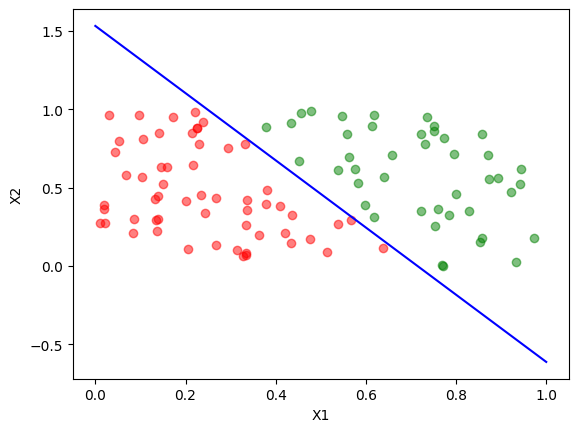

In [82]:
# best_params = {
#     'w1': 0.7,
#     'w2': 0.3,
#     'b': - 0.5
# }

m = -best_params['w1'] / best_params['w2']
h = -best_params['b'] / best_params['w2']

plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

x1 = np.linspace(0, 1, 100)
x2 = m * x1 + h

plt.plot(x1, x2, color='blue')

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()
